## Pytorch - 02 Tutorial begins

## Subject: NN based classification.
###
### Course Material available at the following URL. 
### URL: https://www.learnpytorch.io/02_pytorch_classification/
### Code:  https://github.com/mrdbourke/pytorch-deep-learning


## Scikit Datasets are in the below URL.
### URL: https://scikit-learn.org/stable/datasets/toy_dataset.html



In [203]:
import torch 
import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

## Step-1. Generate Data

In [204]:
n_samples = 1000
X,y = make_circles(n_samples, noise=0.03, random_state=42)
print(f"X.shape: {X.shape}\t y.shape:{y.shape}")
print(f"First 5-samples: X(:5):\n{X[:5]}")
print(f"First 5-samples: y(:5): \n{y[:5]}")

X.shape: (1000, 2)	 y.shape:(1000,)
First 5-samples: X(:5):
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5-samples: y(:5): 
[1 1 1 1 0]


### Scatter Plot of Data

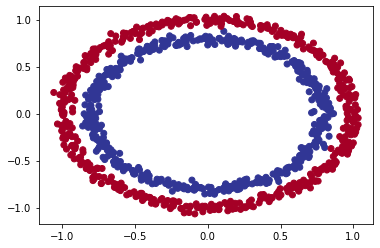

In [205]:
import pandas as pd

# Load data into pandas data frame using dictionary. ['X1', 'X2', 'label'] 
# are the columns of the pandas data frame.  
pd_circles = pd.DataFrame({'X1':X[:,0],'X2':X[:,1], 'label':y})
#
# Plot the dataset using matplotlib. Explanation of fields of scatter plot below. 
# cmap: Color Map 
# plt.cm: Plot color map 
# RdYlBu : Red, Yellow, Blue 
# c = y: Colour is modulated by 'y' labels.
#
plt.scatter(x=pd_circles['X1'], y=pd_circles['X2'], c=pd_circles['label'], cmap=plt.cm.RdYlBu)
plt.show()

## Step-2: Generate Tensors from Data

In [206]:
# Convert raw numpy arrays into tensors for enabling further data processing. 
X_tensor = torch.from_numpy(X).type(torch.float)  # Even 'float32' and 'float' are equivalent.
y_tensor = torch.from_numpy(y).type(torch.float)  # Even 'float32' and 'float' are equivalent.

### Generate Training & Test Split

In [207]:
import torch 
from sklearn import model_selection

print(f"torch version: {torch.__version__}") # Should be > 10.0

# Divide DataFrame into train & test samples. This time by using Scikit's train_and_test_split 
# routines. 
sklearn.model_selection.train_test_split
X_trng, X_test,y_trng,y_test = model_selection.train_test_split(X_tensor,
                                                                y_tensor,
                                                                test_size=0.2, 
                                                                random_state=42)

torch version: 1.11.0


## Step-3. Run Test and Training Loop.### 1. Define Model 
### 1. Define Model in Device agnostic manner
### 2. Define Loss Function 
### 3. Define Optimizer, Number of Epochs  
### 4. Training Loop, Run Forward Pass
#### 5. Measure Loss, Optimizer Step, Test Error too 
### 6. Store Model

In [208]:
from torch import nn 

#
# Define Model Class. This provides flexibility to define arbitrary 
# DL architecture by subclassing from nn.Module. Look at the init as 
# well as forward methods! We could have simply used nn.Sequential() 
# to accommodate the same below. But this is IMPORTANT to model any 
# complicated Neural Architecture. 
#
class CircleModelV0 (nn.Module):
    def __init__(self, numInpFeats, numOutFeats):
        
        super(CircleModelV0,self).__init__()
        
        num_nodes_hidden_layer = 24
        
        # Layer-1 
        self._layer1 = nn.Linear(in_features=numInpFeats, out_features=num_nodes_hidden_layer)
        
        # Layer-1 
        self._layer2 = nn.Linear(in_features=num_nodes_hidden_layer, out_features=numOutFeats)
        
        pass
    
    def forward(self,X): 
       return (self._layer2(self._layer1(X))) # x -> layer_1 -> layer_2 
    pass 


#
# Look at the init as well as forward methods! But this is IMPORTANT to model any 
# complicated Neural Architecture. 
#
class CircleModelV1 (nn.Module):
    def __init__(self, numInpFeats, numOutFeats):
        
        super(CircleModelV1,self).__init__()
        
        num_nodes_hidden_layer = 24
        
        # Layer-1 
        self._layer1 = nn.Linear(in_features=numInpFeats, out_features=num_nodes_hidden_layer)
        
        # Layer-1 
        self._layer2 = nn.Linear(in_features=num_nodes_hidden_layer, out_features=numOutFeats)
        
        # Will it work? 
        self._model = nn.Sequential(self._layer1, self._layer2)
        pass
    
    def forward(self,X): 
        return self._model(X)
    pass 

In [209]:
import torch 
from torch import nn 

# Define device 
device = "cuda" if torch.cuda.is_available() == True else "cpu"

# Define Model 
num_in_features = X_trng.shape[1]
num_out_features = 1
ml_model_v0 = CircleModelV0(num_in_features,num_out_features).to(device)
ml_model_v1 = CircleModelV1(num_in_features,num_out_features).to(device)

# Take a look at state_dict() 
print(f"ml_model_v0: state_dict => {ml_model_v0.state_dict()}\n") 
print(f"ml_model_v1: state_dict => {ml_model_v1.state_dict()}\n") 

ml_model_v0: state_dict => OrderedDict([('_layer1.weight', tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998],
        [ 0.5451,  0.1045],
        [-0.3301,  0.1802],
        [-0.3258, -0.0829],
        [-0.2872,  0.4691],
        [-0.5582, -0.3260],
        [-0.1997, -0.4252],
        [ 0.0667, -0.6984],
        [ 0.6386, -0.6007],
        [ 0.5459,  0.1177],
        [-0.2296,  0.4370],
        [ 0.1102,  0.5713],
        [ 0.0773, -0.2230],
        [ 0.1900, -0.1918],
        [ 0.2976,  0.6313],
        [ 0.4087, -0.3091],
        [ 0.4082,  0.1265]], device='cuda:0')), ('_layer1.bias', tensor([ 0.3591, -0.4310, -0.7000, -0.2732, -0.5424,  0.5802,  0.2037,  0.2929,
         0.2236, -0.0123,  0.5534, -0.5024,  0.0445, -0.4826,  0.2180, -0.2435,
         0.2167, -0.1473,  0.5865, -0.4191, -0.4217, -0.4217,  0.6360,  

In [210]:
inp_tensor = torch.tensor([0.2,0.3]).to(device)
out_0 = ml_model_v0 (inp_tensor)
out_1 = ml_model_v1 (inp_tensor)
print(f"out_0: {out_0} \n out_1: {out_1}")

out_0: tensor([0.6720], device='cuda:0', grad_fn=<AddBackward0>) 
 out_1: tensor([0.6278], device='cuda:0', grad_fn=<AddBackward0>)


## Start: Putting it all together for a multiclass classification problem.

In [211]:
# IMPORT Block starts ...
import torch 
from torch import nn
import sklearn 
from sklearn.model_selection import train_test_split
import numpy as np

# Multiple blobs for MC classification
from sklearn.datasets import make_blobs  

# All plotting libs 
import matplotlib.pyplot as plt 
import matplotlib.colors as plt_colors  

# torchmetrics objects 
import torchmetrics 
from torchmetrics.functional import accuracy
from torchmetrics.functional import precision
from torchmetrics.functional import recall
from torchmetrics.classification import F1Score
from torchmetrics import ConfusionMatrix




# IMPORT Block ends.

# Debug Data 
_global_debug = False

# Generate Multiclass data 
def GenerateData(seedValue, numCenters, numFeats, numSamples):
    # Create data set from sklearn
    seed_val = seedValue 
    num_samples = numSamples # 1000
    num_centers = numCenters # 4 
    num_feats = numFeats     # 2 
    noise_level = 0.01 # Default: 1.5 
    X,y = make_blobs(n_samples=num_samples, 
                             centers=num_centers, n_features=num_feats,
                             cluster_std=noise_level ,
                            random_state=seed_val)
    return (X,y)
    
# Plot the blobs 
def PlotBlobs (X,y): 
    #
    # Define custom colour map. Original label i.e. y array containing 4-unique 
    # values - namely, 0/1/2/3. Let us map each value to a color as below. 
    #
    # custom_cmap =  plt_colors.ListedColormap(["red","green","blue", "black"])
    custom_cmap =  plt_colors.ListedColormap(["red","green","blue", "black", "pink", "cyan", "gray", "yellow"])


    plt.figure(figsize=(12,8))
    plt.title("MakeBolb Scatter Diagram")
    plt.xlabel("X[0]")
    plt.ylabel("X[1]")
    cmap_list = np.unique(list(y))
    plt.scatter(X[:,0], X[:,1], c=y, cmap=custom_cmap)
    pass 

# Plot the train/test accuracy, loss with respect to epochs  
def PlotMetricsOrg (lstEpoch, lstLossTrain,lstLossTest, lstAccTrain,lstAccTest): 
    #
    # Define custom colour map. Original label i.e. y array containing 4-unique 
    # values - namely, 0/1/2/3. Let us map each value to a color as below. 
    #
    custom_cmap =  plt_colors.ListedColormap(["red","green","blue", "black"])

    plt.figure(figsize=(12,12))
    plt.title("Accuracy: Train/Test")
    plt.xlabel("epochs")
    plt.ylabel("%Accuracy")
    # cmap_list = np.unique(list(m_blobs[1]))
    plt.plot(lstEpoch, lstAccTrain, label="Acc: Train", c='red')
    plt.plot(lstEpoch, lstAccTest, label="Acc: Test", c='blue')
    plt.legend() 
    plt.show() 

    plt.figure(figsize=(12,12))
    plt.title("Loss: Train/Test")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    # cmap_list = np.unique(list(m_blobs[1]))
    plt.plot(lstEpoch, lstLossTrain, label="Loss: Train", c='red')
    plt.plot(lstEpoch, lstLossTest, label="Loss: Test", c='blue')    
    plt.legend() 
    plt.show() 
    
    pass 

# Plot the train/test accuracy, loss with respect to epochs  
def PlotMetrics (lstEpoch, lstLossTrain,lstLossTest, lstAccTrain,lstAccTest): 
    #
    # Define custom colour map. Original label i.e. y array containing 4-unique 
    # values - namely, 0/1/2/3. Let us map each value to a color as below. 
    #
    
    # Create space for two plots
    if (_global_debug==True):
        print(f"Epoch:{lstEpoch}")
        print(f"LossTrain:{lstLossTrain}")
        print(f"LossTest:{lstLossTest}")
    
    fig, axs = plt.subplots(2,2, figsize=(20,8))
    # fig(figsize=(12,8))
    # fig.figure(figsize=(12,12))
    fig.suptitle("Performance Graphs")
    
    axs[0,0].set_title("Accuracy: Train/Test")
    axs[0,0].set_xlabel("epochs")
    axs[0,0].set_ylabel("%accuracy")
    axs[0,0].grid(True, linestyle='-', linewidth=1.5, color='gray')
    axs[0,0].plot(lstEpoch, lstAccTrain, label="Acc: Train", c='blue')
    axs[0,0].plot(lstEpoch, lstAccTest,  label="Acc: Test",  c='red')
    axs[0,0].legend(loc='upper right', bbox_to_anchor=(1, 1.05)) 
    
    plt.subplots_adjust(hspace=1) 
    
    axs[0,1].set_title("Loss: Train/Test")
    axs[0,1].set_xlabel("epochs")
    axs[0,1].set_ylabel("loss")
    axs[0,1].grid(True, linestyle='-', linewidth=1.5, color='gray')
    
    axs[0,1].plot(lstEpoch, lstLossTrain, label="Loss: Train", c='blue')
    axs[0,1].set_xlim(0, int(lstEpoch[-1])+1)   
    axs[0,1].plot(lstEpoch, lstLossTest,  label="Loss: Test",  c='red')
    axs[0,1].legend(loc='upper right', bbox_to_anchor=(1, 1.05)) 
    plt.subplots_adjust(hspace=2) 
    plt.show() 

    pass 


# Plot Decision Boundaries 
def PlotDecisionBoundary(device:str, X: np.array, y: np.array, model: torch.nn.Module) -> None: 
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    # model.to(device)
    X, y = torch.from_numpy(X).to("cpu"), torch.from_numpy(y).to("cpu")
#     X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).type(torch.float32)

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on.to(device)).to(device)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).to('cpu').detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    pass 



# Model creation: Multi Class Classifier Model A 
class ClassifierMC_modelA (nn.Module):
    # Internal variables 
    #_model = None
    
    # Constructor 
    """ Initializes multi-class classifier. This is an example of docstring in Python. 
    Args:
        device: If the device class is 'cuda' or 'cpu'
        numInpDims: What is the input vector size
        numClasses: What is the output vector size
    Returns:
        Returns nothing. 
    Example:
        None.
    """
    def __init__(self, numInpDims, numClasses):
        #super().__init__()
        super(ClassifierMC_modelA,self).__init__()
    
        self._model = nn.Sequential(
            nn.Linear(in_features=numInpDims,out_features=10), #nn.ReLU(10),
            nn.Linear(in_features=10,        out_features=10), #nn.ReLU(50),
            nn.Linear(in_features=10,        out_features=10), # nn.ReLU(50),
            nn.Linear(in_features=10,        out_features=numClasses)
        )
        
    # This method straightway returns the logits. If we use CrossEntropyLoss() as the 
    # loss function which expects logits to be returned, this is a MUST. 
    def forward(self,X):
        y_logits = self._model(X) # Output of last linear layer
        return (y_logits)

    # This method straightway returns the argmax. But it won't work if we use 
    # CrossEntropyLoss() as the loss function which expects logits to be returned. 
    def forward_bkup(self,X):
        y_logits = self._model(X) # Output of last linear layer
        y_probs_argmax = torch.softmax(y_logits, dim=1),argmax(dim=1) # Convert into softmax
        return (y_probs_argmax)

    pass 

# Model creation: Multi Class Classifier Model B 
class ClassifierMC_modelB (nn.Module):
    # Internal variables 
    #_model = None
    
    # Constructor 
    """ Initializes multi-class classifier. This is an example of docstring in Python. 
    Args:
        device: If the device class is 'cuda' or 'cpu'
        numInpDims: What is the input vector size
        numClasses: What is the output vector size
    Returns:
        Returns nothing. 
    Example:
        None.
    """
    def __init__(self, numInpDims, numClasses):
        #super().__init__()
        super(ClassifierMC_modelB,self).__init__()
    
        self._model = nn.Sequential(
            nn.Linear(in_features=numInpDims,out_features=64), nn.ReLU(64),
            nn.Linear(in_features=64,        out_features=32), nn.ReLU(32),
            nn.Linear(in_features=32,        out_features=16), nn.ReLU(16),
            nn.Linear(in_features=16,        out_features=numClasses)
        )
        
    # This method straightway returns the logits. If we use CrossEntropyLoss() as the 
    # loss function which expects logits to be returned, this is a MUST. 
    def forward(self,X):
        y_logits = self._model(X) # Output of last linear layer
        return (y_logits)

    # This method straightway returns the argmax. But it won't work if we use 
    # CrossEntropyLoss() as the loss function which expects logits to be returned. 
    def forward_bkup(self,X):
        y_logits = self._model(X) # Output of last linear layer
        y_probs_argmax = torch.softmax(y_logits, dim=1),argmax(dim=1) # Convert into softmax
        return (y_probs_argmax)

    pass 


# Model creation: Multi Class Classifier Model A 
class ClassifierMC_model_Bahana (nn.Module):
    # Internal variables 
    #_model = None
    
    # Constructor 
    """ Initializes multi-class classifier. This is an example of docstring in Python. 
    Args:
        device: If the device class is 'cuda' or 'cpu'
        numInpDims: What is the input vector size
        numClasses: What is the output vector size
    Returns:
        Returns nothing. 
    Example:
        None.
    """
    def __init__(self, numInpDims, numClasses):
        #super().__init__()
        super(ClassifierMC_model_Bahana,self).__init__()
    
        self._model = nn.Sequential(
            nn.Linear(in_features=numInpDims,out_features=10), nn.ReLU(10),
#             nn.Linear(in_features=10,        out_features=10), #nn.ReLU(50),
#             nn.Linear(in_features=10,        out_features=10), # nn.ReLU(50),
            nn.Linear(in_features=10,        out_features=numClasses)
        )
        
    # This method straightway returns the logits. If we use CrossEntropyLoss() as the 
    # loss function which expects logits to be returned, this is a MUST. 
    def forward(self,X):
        y_logits = self._model(X) # Output of last linear layer
        return (y_logits)

    # This method straightway returns the argmax. But it won't work if we use 
    # CrossEntropyLoss() as the loss function which expects logits to be returned. 
    def forward_bkup(self,X):
        y_logits = self._model(X) # Output of last linear layer
        y_probs_argmax = torch.softmax(y_logits, dim=1),argmax(dim=1) # Convert into softmax
        return (y_probs_argmax)

    pass 


# Compute Classification Accuracy 
def ClassificationAcc(yPred:torch.Tensor, yTarget:torch.Tensor)-> float:

    # How many total entries? 
    total_num_elems = len(yPred)
    
    # How many matched?
    num_matched = len(yPred[yPred==yTarget])
    
    # Accuracy Percentage. Unit is % 
    pcnt_acc = (100.0*num_matched/total_num_elems) 
    return (pcnt_acc)


# Train Loop 
def Train(device:str, X:np.ndarray, y:np.ndarray, modelObj: nn.Module, numEpochs: int, seedVal:int)-> None:
    
    # Set seed values 
    manual_seed_val = seedVal
    torch.manual_seed(manual_seed_val)
    torch.cuda.manual_seed(manual_seed_val)
    
    
    # make_blobs returned value are non tensors. 
    X = torch.from_numpy(X).type(torch.float)
    y = torch.from_numpy(y).type(torch.LongTensor)

    # Divide data into train/test 
    X_train, X_test, y_train, y_test = train_test_split(
                    X,y,test_size=0.2, random_state=42, shuffle=True)
    X_train = X_train.to(device)
    X_test = X_test.to(device)
    y_train = y_train.to(device)
    y_test = y_test.to(device)
        
    # Training related parameters 
    
    # How many epochs?
    num_epochs = numEpochs
    
    # For multiclass classification 
    loss_fn = nn.CrossEntropyLoss() 
    
    # Optimizer for parameter update through gradient descent 
    # optimizer = torch.optim.SGD(modelObj.parameters(), lr=0.1)
    optimizer = torch.optim.SGD(modelObj.parameters(), lr=0.1,momentum=0.9)
    
    # Accuracy Plot arrays 
    log_epoch = []
    log_train_loss = []
    log_test_loss = []
    log_train_acc = [] 
    log_test_acc = [] 
    
    # Big training loop 
    for epoch in range(num_epochs): 
        modelObj.train() 
        y_train_logits_pred = modelObj(X_train)
        loss_train = loss_fn(y_train_logits_pred, y_train)
        optimizer.zero_grad() 
        loss_train.backward()
        optimizer.step()
        modelObj.eval()
        with torch.inference_mode(): 
            y_test_logits_pred = modelObj(X_test)
            loss_test = loss_fn(y_test_logits_pred, y_test)
            
            # Convert logits to labels. 
            y_train_preds = torch.softmax(y_train_logits_pred,dim=1).argmax(dim=1) 
            y_test_preds = torch.softmax(y_test_logits_pred,dim=1).argmax(dim=1) 
            
            pcnt_acc_train = ClassificationAcc(y_train_preds,y_train)
            pcnt_acc_test = ClassificationAcc(y_test_preds,y_test)
            
            # Push intermediate results at periodic intervals
            if (epoch%50 == 0):
                log_epoch.append(epoch)
                log_train_loss.append(loss_train.item())
                log_test_loss.append(loss_test.item())
                log_train_acc.append(pcnt_acc_train)
                log_test_acc.append(pcnt_acc_test) 
                if (_global_debug == True):
                    print(f"EPOCH: {epoch}\t|ACC(trng):{pcnt_acc_train}|\tACC(test):{pcnt_acc_test}\n")
    
    # Plot Blobs  
    # PlotBlobs (lstEpoch, lstLossTrain,lstLossTest, lstAccTrain,lstAccTest)
    if (_global_debug == True): print("Out of training loop ... ")

    # Plot all metrics 
    PlotMetrics (log_epoch, log_train_loss,log_test_loss, log_train_acc,log_test_acc)
    if (_global_debug == True): print("Out of PlotMetrics ... ")
    
    pass 

# Prediction Loop below. 
""" Doc string. 
    Args:
        xTest: Test Predictor batch of Features
    Returns:
        Label arrays
    Example: 
        None.
"""  
def PredictLabels(device:str, xTest:np.ndarray, objModel:nn.Module) -> np.ndarray :
    # Only this needs to be on to(device). Rest is OK.
    x_test_tensor = torch.from_numpy(xTest).type(torch.float).to(device)
    
    y_logits = objModel(x_test_tensor)
    y_probs = torch.softmax(y_logits, dim=1)
    y_labels = torch.argmax(y_probs,dim=1)
    return y_labels.cpu().numpy()

#
# Compute Accuracy Metrics from torchmetrics package. <device, X,y, ml_model>
# Reference URL: https://lightning.ai/docs/torchmetrics/stable/
# 
def ComputeMetrics(device:str, xPredictors_np:np.ndarray, yTarget_np:np.ndarray, 
                   modelObj: nn.Module, numClasses:int) -> float:
    
    # Put in eval mode.
    modelObj.eval() 
    
    # Test only. 
    with torch.inference_mode(): 
        # First compute predictions 
        xPredictors_tensor = torch.from_numpy(xPredictors_np).type(torch.float).to(device)
        yPreds_logits_tensor = modelObj(xPredictors_tensor)
        yPreds_probs_tensor = torch.softmax(yPreds_logits_tensor, dim=-1).cpu()
        
        # Now call torchmetrics objects 
        num_classes = numClasses
        yTarget_tensor = torch.from_numpy(yTarget_np) 
        
        # Compute Performance Metrics 
        metrics_acc                  = accuracy(yPreds_probs_tensor, yTarget_tensor, 
                                                task="multiclass", num_classes=num_classes)
        metrics_prec                 = precision(yPreds_probs_tensor, yTarget_tensor, 
                                                task="multiclass", num_classes=num_classes)
        metrics_recall               = recall(yPreds_probs_tensor, yTarget_tensor, 
                                                task="multiclass", num_classes=num_classes)
        
        metrics_f1_obj               = F1Score(task="multiclass", num_classes=numClasses) 
        f1_metrics                   = metrics_f1_obj(yPreds_probs_tensor, yTarget_tensor)
        
        confmat                      = ConfusionMatrix(task="multiclass", num_classes=num_classes)
        metrics_confusion_matrix     = confmat(yPreds_probs_tensor, yTarget_tensor)
        
        json_perf_schema = { "accuracy":metrics_acc, "precision":metrics_prec, 
                        "recall": metrics_recall, "f1_score":f1_metrics, 
                        "metrics_confusion_matrix":metrics_confusion_matrix}
        return(json_perf_schema)


# Driver routine. 
def Main():
    # Define device. 
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    seed_value = 42 
    
    # Generate Data 
    num_inp_dims = 2; num_classes = 8; num_samples = 1000;
    
    X,y = GenerateData(seed_value, num_classes, num_inp_dims, num_samples)
    
    # Plot images 
    PlotBlobs(X, y)
    
    # Build Model 
    ml_model = ClassifierMC_model_Bahana(num_inp_dims,num_classes).to(device) 
#     ml_model = ClassifierMC_modelB(num_inp_dims,num_classes).to(device)
#     ml_model = ClassifierMC_modelA(num_inp_dims,num_classes).to(device)
    
    # Train and plot the outcome 
    num_epochs = 5000
    Train(device, X,y, ml_model, num_epochs, seed_value)
    
    # Plot decision Boundaries. 
    # Plot_decision_boundary(X: numpy.array, y: numpy.array, model: torch.nn.Module)
    PlotDecisionBoundary(device, X, y,ml_model)
    
    # Predict labels 
    start_index = 0 ; stop_index = 100
    predictors = X[start_index:stop_index]
    labels = PredictLabels(device,predictors, ml_model)
    print(f"Labels: {labels}\n") 
    
    # Compute Accuracy Metrics:
    # ComputeMetrics(device:str, xPredictors_np:np.ndarray, yTarget_np:np.ndarray, modelObj: nn.Module, numClasses:int)
    # json_schema: { "accuracy":metrics_acc, "precision":metrics_precision,"recall": metrics_recall, "f1_score":metrics_f1, 
    #                "metrics_confusion_matrix":metrics_confusion_matrix}
    json_schema = ComputeMetrics(device, X,y, ml_model, num_classes)
    print(f"json_schema: {json_schema}\n") 
    
    pass 

## End: Putting it all together for a multiclass classification problem.

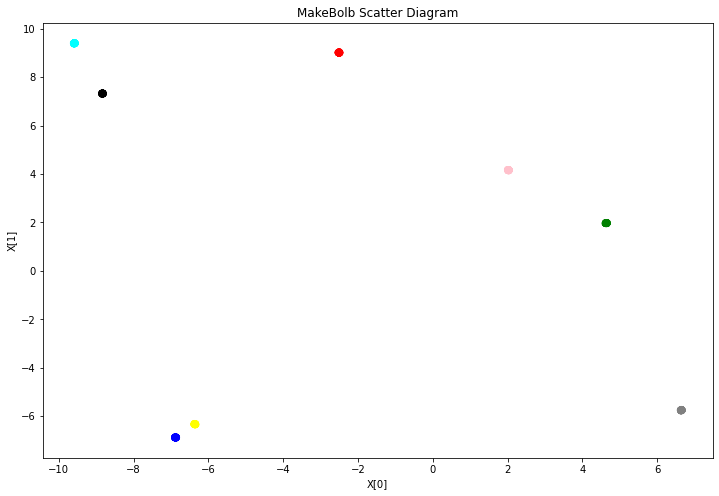

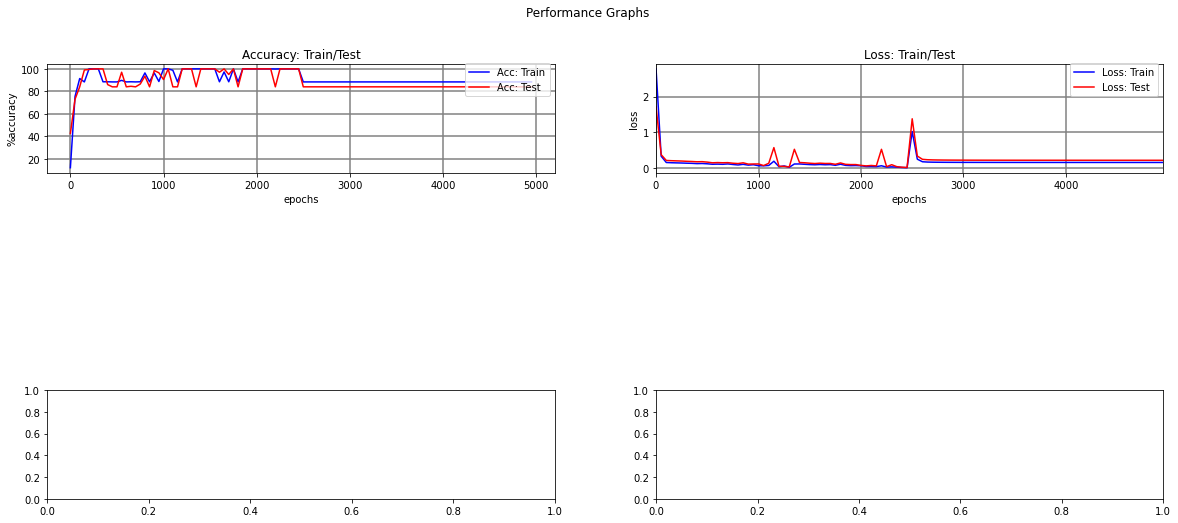

Labels: [7 7 7 4 3 1 1 3 4 5 3 6 6 6 3 5 3 6 5 4 4 6 7 0 6 1 7 3 1 3 6 7 4 7 1 1 7
 3 3 7 1 5 7 3 0 7 7 4 3 1 4 0 6 0 7 6 1 3 1 3 7 7 3 0 3 1 7 5 1 3 0 4 5 4
 5 0 7 6 3 5 5 3 0 1 4 3 0 7 7 7 6 7 7 3 7 4 4 7 7 3]

json_schema: {'accuracy': tensor(0.8750), 'precision': tensor(0.8750), 'recall': tensor(0.8750), 'f1_score': tensor(0.8750), 'metrics_confusion_matrix': tensor([[125,   0,   0,   0,   0,   0,   0,   0],
        [  0, 125,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 125],
        [  0,   0,   0, 125,   0,   0,   0,   0],
        [  0,   0,   0,   0, 125,   0,   0,   0],
        [  0,   0,   0,   0,   0, 125,   0,   0],
        [  0,   0,   0,   0,   0,   0, 125,   0],
        [  0,   0,   0,   0,   0,   0,   0, 125]])}



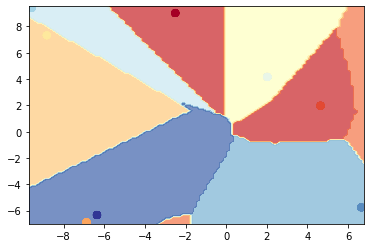

In [212]:
Main()